# Team: ChilePeppers

## The Three Datasets:
### 1: EV Charging
### 2: Spotify Data
### 3: Mobile User Data 

A review of all three datasets, in Python is provided below with descriptions of the variables studied using .head() and .info(). The reason and justification for why the team would like to work with the datasets is provided herein. The team has agreed to select the EV Charging Dataset for the project out of an interest to explore that evolving technical space and build predictive models for charging efficiency. 

# Dataset 1
* EV Charging Data

* Source of Data: https://www.kaggle.com/datasets/valakhorasani/electric-vehicle-charging-patterns 

* Description of Observations: This dataset provides a comprehensive analysis of electric vehicle (EV) charging patterns and user behavior. It contains 1,320 samples of charging session data, including metrics such as energy consumption, charging duration, and vehicle details. Each entry captures various aspects of EV usage, allowing for insightful analysis and predictive modeling.

* Ethical Concerns: The dataset has user IDs and specific charging station locations, which means there’s a chance it could reveal patterns in people’s movements and behaviors. To protect privacy, it’s important to keep user IDs anonymous and possibly generalize location data so individuals can’t be tracked. Researchers also need to handle this information carefully and follow data protection rules to use it responsibly.

* Question: 
    1. How do vehicle model, user type, and starting state of charge influence the cost and duration of EV charging sessions at public stations?
    2. Exploring energy consumption and charging behaviors
    3. Building predictive models for charging efficiency

* Importance:Understanding the costs and durations associated with different EV types and user profiles can help:
    * Consumers make cost-effective charging decisions.
    * Charging service providers optimize station usage and pricing strategies by identifying patterns in energy demand and time usage.

* Hypothesis:
    * Vehicle Model: Larger battery capacity models will have longer charging times and higher costs.
    * User Type: Frequent users (like commuters) may incur lower costs per session due to shorter, more regular charging patterns.
    * Starting State of Charge: Lower starting charge levels are expected to lead to longer and more costly charging sessions.

* Variable Types:
Categorical Variables: Vehicle Model, User Type
Quantitative Variables: Charging Cost (USD), Charging Duration (hours), State of Charge (Start %)

In [16]:
import warnings
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


warnings.filterwarnings("ignore")

In [17]:
'''
file_path = (r'data/ev_charging_patterns.csv')

ev_charging = pd.read_csv(file_path, encoding='ISO-8859-1')

ev_charging.head()
'''
url = "https://raw.githubusercontent.com/INFO-511-F24/final-project-ChilePeppers/main/data/ev_charging_patterns.csv"

ev_charging  = pd.read_csv(url)

ev_charging.head()

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type
0,User_1,BMW i3,108.463007,Station_391,Houston,1/1/2024 0:00,1/1/2024 0:39,60.712346,0.591363,36.389181,13.087717,Evening,Tuesday,29.371576,86.119962,293.602111,27.947953,2.0,DC Fast Charger,Commuter
1,User_2,Hyundai Kona,100.000000,Station_428,San Francisco,1/1/2024 1:00,1/1/2024 3:01,12.339275,3.133652,30.677735,21.128448,Morning,Monday,10.115778,84.664344,112.112804,14.311026,3.0,Level 1,Casual Driver
2,User_3,Chevy Bolt,75.000000,Station_181,San Francisco,1/1/2024 2:00,1/1/2024 4:48,19.128876,2.452653,27.513593,35.667270,Morning,Thursday,6.854604,69.917615,71.799253,21.002002,2.0,Level 2,Commuter
3,User_4,Hyundai Kona,50.000000,Station_327,Houston,1/1/2024 3:00,1/1/2024 6:42,79.457824,1.266431,32.882870,13.036239,Evening,Saturday,83.120003,99.624328,199.577785,38.316313,1.0,Level 1,Long-Distance Traveler
4,User_5,Hyundai Kona,50.000000,Station_108,Los Angeles,1/1/2024 4:00,1/1/2024 5:46,19.629104,2.019765,10.215712,10.161471,Morning,Saturday,54.258950,63.743786,203.661847,-7.834199,1.0,Level 1,Long-Distance Traveler


In [18]:
ev_charging.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   User ID                                   1320 non-null   object 
 1   Vehicle Model                             1320 non-null   object 
 2   Battery Capacity (kWh)                    1320 non-null   float64
 3   Charging Station ID                       1320 non-null   object 
 4   Charging Station Location                 1320 non-null   object 
 5   Charging Start Time                       1320 non-null   object 
 6   Charging End Time                         1320 non-null   object 
 7   Energy Consumed (kWh)                     1254 non-null   float64
 8   Charging Duration (hours)                 1320 non-null   float64
 9   Charging Rate (kW)                        1254 non-null   float64
 10  Charging Cost (USD)                 

# Dataset 2
* Spotify Data

* Source of the Data:
https://www.kaggle.com/datasets/abdulszz/spotify-most-streamed-songs
This dataset originates from Apple's and Spotify's public API. Each track’s streaming metrics and musical attributes could have been aggregated from streaming services' API or charts, though specific documentation would be necessary to confirm.

* Description of Observations:
Observations include details on each song’s title, artist(s), release date, and musical attributes (e.g., tempo, key, mode, acousticness, danceability). There are also metrics related to streaming, such as chart ranks and playlist placements on various platforms.

* Ethical Concerns:
The primary ethical concern is the potential for data bias. Since popular songs are more likely to be Western or English-language songs, this could lead to cultural or genre bias in the analysis. Furthermore, if the data includes rankings or metrics derived from proprietary algorithms, care should be taken to avoid misuse or misinterpretation of these rankings.

* Question: 
How do musical attributes (such as tempo, energy, and valence) affect a song’s popularity on Spotify as measured by the number of streams and inclusion in playlists?

* Importance: 
Understanding the relationship between musical attributes and popularity can be valuable for artists, producers, and streaming platforms to optimize song characteristics for a wider audience reach.

* Hypothesis: 
Higher energy and danceability correlate with higher popularity metrics, as listeners may prefer upbeat and energetic tracks.

* Variable Types:
Categorical: Key, mode, release date
Quantitative: Streams, danceability, valence, energy, acousticness, instrumentalness

In [19]:

'''
file_path = "data\Spotify Most Streamed Songs.csv"

Spotify_db = pd.read_csv(file_path, encoding='ISO-8859-1')

Spotify_db.head()
'''"Project Milestone 2.ipynb"

url = "https://raw.githubusercontent.com/INFO-511-F24/final-project-ChilePeppers/main/data/Spotify_Most_Streamed_Songs.csv"

Spotify_db = pd.read_csv(url)

Spotify_db.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,Not Found
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,https://i.scdn.co/image/ab67616d0000b2730656d5...
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,https://i.scdn.co/image/ab67616d0000b273e85259...
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,https://i.scdn.co/image/ab67616d0000b273e787cf...
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,65,23,80,14,63,11,6,https://i.scdn.co/image/ab67616d0000b273ab5c9c...


In [20]:
Spotify_db.info

<bound method DataFrame.info of                               track_name      artist(s)_name  artist_count  \
0    Seven (feat. Latto) (Explicit Ver.)    Latto, Jung Kook             2   
1                                   LALA         Myke Towers             1   
2                                vampire      Olivia Rodrigo             1   
3                           Cruel Summer        Taylor Swift             1   
4                         WHERE SHE GOES           Bad Bunny             1   
..                                   ...                 ...           ...   
948                         My Mind & Me        Selena Gomez             1   
949            Bigger Than The Whole Sky        Taylor Swift             1   
950                 A Veces (feat. Feid)  Feid, Paulo Londra             2   
951                        En La De Ella  Feid, Sech, Jhayco             3   
952                                Alone           Burna Boy             1   

     released_year  released_mo

# Dataset 3
* Mobile user Behavior



* source of Data: https://www.kaggle.com/datasets/valakhorasani/mobile-device-usage-and-user-behavior-dataset

* Description of Observation: This dataset provides a comprehensive analysis of mobile device usage patterns and user behavior classification. It contains 700 samples of user data, including metrics such as app usage time, screen-on time, battery drain, and data consumption. Each entry is categorized into one of five user behavior classes, ranging from light to extreme usage, allowing for insightful analysis and modeling.
*  Ethical Concerns: The Mobile Device Usage and User Behavior dataset raises potential privacy concerns, as it includes detailed behavioral metrics that could reveal patterns of individual users if personally identifiable information were present. Ensuring that data is anonymized and securely stored is essential to protect user privacy. Additionally, responsible analysis is important to avoid misinterpreting or stereotyping user behavior, which could lead to biased conclusions or inappropriate applications of the findings.

* Question: 
Predicting Battery Drain in Mobile Devices 

* Importance: 
Understanding and predicting battery usage is essential for improving device performance, enhancing user experience, and guiding power optimization strategies.


* Variable Types:
Categorical: Device Model,Operating System, Number of Apps Installed, Age, Gender
Quantitative: App Usage Time, Screen On Time, Data Usage

In [21]:

#data = pd.read_csv('data/Mobile_user_behavior_dataset.csv', encoding='ISO-8859-1')
#data.head()


url = "https://raw.githubusercontent.com/INFO-511-F24/final-project-ChilePeppers/main/data/Mobile_user_behavior_dataset.csv"

data = pd.read_csv(url)

data.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [22]:
print(data.info)

<bound method DataFrame.info of      User ID        Device Model Operating System  App Usage Time (min/day)  \
0          1      Google Pixel 5          Android                       393   
1          2           OnePlus 9          Android                       268   
2          3        Xiaomi Mi 11          Android                       154   
3          4      Google Pixel 5          Android                       239   
4          5           iPhone 12              iOS                       187   
..       ...                 ...              ...                       ...   
695      696           iPhone 12              iOS                        92   
696      697        Xiaomi Mi 11          Android                       316   
697      698      Google Pixel 5          Android                        99   
698      699  Samsung Galaxy S21          Android                        62   
699      700           OnePlus 9          Android                       212   

     Screen On Time

In [23]:
data['Device Model'].unique()

array(['Google Pixel 5', 'OnePlus 9', 'Xiaomi Mi 11', 'iPhone 12',
       'Samsung Galaxy S21'], dtype=object)

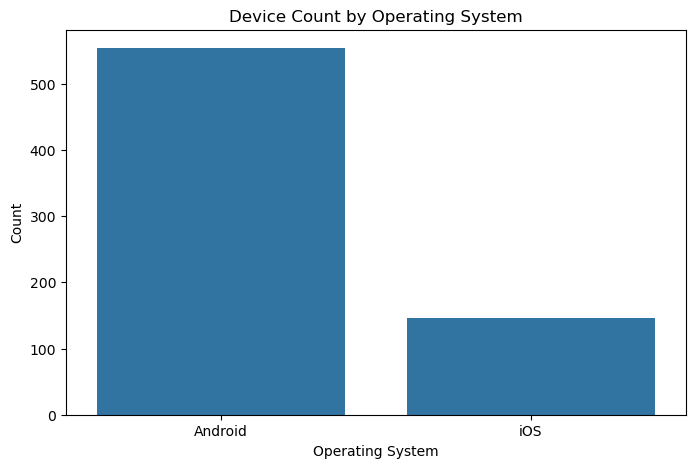

In [24]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Operating System', data=data)
plt.title('Device Count by Operating System')
plt.xlabel('Operating System')
plt.ylabel('Count')
plt.show()

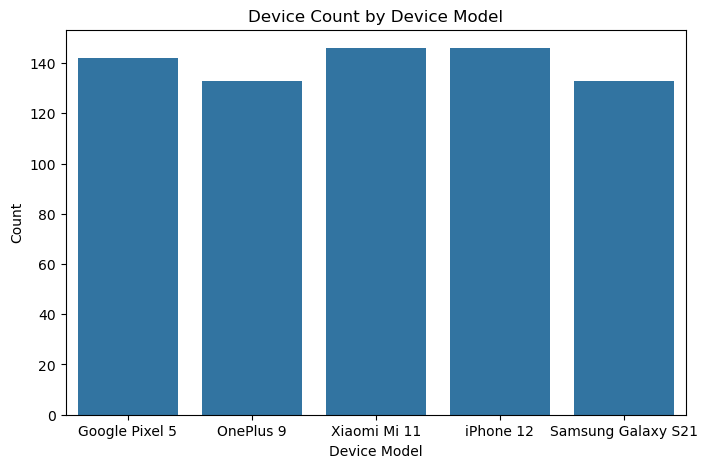

In [25]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Device Model', data=data)
plt.title('Device Count by Device Model')
plt.xlabel('Device Model')
plt.ylabel('Count')
plt.show()